<a href="https://colab.research.google.com/github/cysorianoc/DEEP_LEARNING_PROJECTS/blob/main/IMAGE_RECOGNITION_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORT TENSORFLOW AND OTHER LIBRARIES
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input
import numpy as np
import matplotlib.pyplot as plt

Let's define some fixed parameters

In [ ]:
NUM_CLASES=10

# Reshape 28 by 28 pixel images to  flatten array of 784 pixels
RESHAPED = 784

In [ ]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
#Split test and train data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()




29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


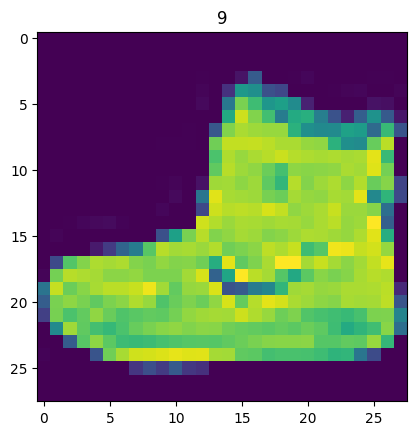

(28, 28)


In [ ]:
#Let's explore one image to see the shape and plot
plt.imshow(train_images[0])
plt.title(train_labels[0])
plt.show()

#Let's also see image shape
print(train_images[0].shape)


In [ ]:
# We need to reshape the images
train_images = train_images.reshape(train_images.shape[0], RESHAPED)
test_images = test_images.reshape(test_images.shape[0], RESHAPED)

In [ ]:
# Let's inspect the new shape
train_images.shape

(60000, 784)

In [ ]:
# Also images have to be normalized
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [ ]:
# Note that labels go from 0 to 9
# In keras we need to convert them to one-hot encoded representations
# AS we will get probabilities fo decide with softmax to what category they belong
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# Labels have to be one-hot encoded
train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASES)

In [ ]:
# So here we see the one=hot encoded representation of one image
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

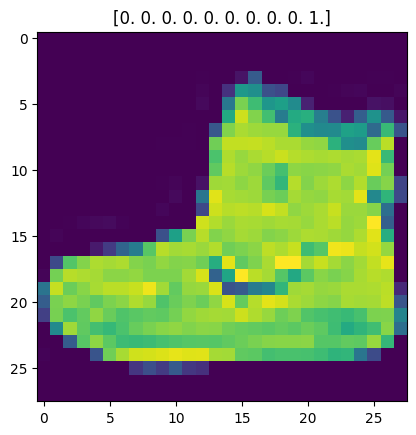

In [ ]:
# Note that images are one vector of 784 images to plot it
# again we  should reshape it back
plt.imshow(train_images[0].reshape(28,28))
plt.title(train_labels[0])
plt.show()

# Train a simple Neural Network

In [ ]:
model = Sequential([
    Input(shape=(RESHAPED,)),       # Input layer: expects data of shape (RESHAPED,)
    #Dense(128, activation='relu'),  # Hidden layer with 128 neurons # Uncomment to increase model capacity for learning complex patterns
    Dense(NUM_CLASES, activation='softmax')  # Output layer with softmax # 'softmax' ensures outputs represent class probabilities (sum = 1)
])
# Compile the model: define how it learns and how performance is measured
model.compile(optimizer='sgd', # Stochastic Gradient Descent optimizer (basic learning algorithm)
              loss='categorical_crossentropy', # Loss function for multi-class classification
              metrics=['accuracy']) # Metric to monitor during training (classification accuracy)
# Display model architecture summary
# Shows layer types, output shapes, and number of trainable parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model

BATCH_SIZE=128
EPOCHS=200
VALIDATION_SPLIT=0.2

history = model.fit(train_images, train_labels,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5433 - loss: 1.5594 - val_accuracy: 0.7159 - val_loss: 0.8935
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7253 - loss: 0.8606 - val_accuracy: 0.7567 - val_loss: 0.7602
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7595 - loss: 0.7499 - val_accuracy: 0.7744 - val_loss: 0.6954
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7816 - loss: 0.6891 - val_accuracy: 0.7867 - val_loss: 0.6567
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7882 - loss: 0.6575 - val_accuracy: 0.7943 - val_loss: 0.6289
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7977 - loss: 0.6253 - val_accuracy: 0.8012 - val_loss: 0.6084
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8044 - loss: 0.6079 - val_accuracy: 0.8048 - val_loss: 0.5923
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8083 - loss: 0.5900 - val_accu

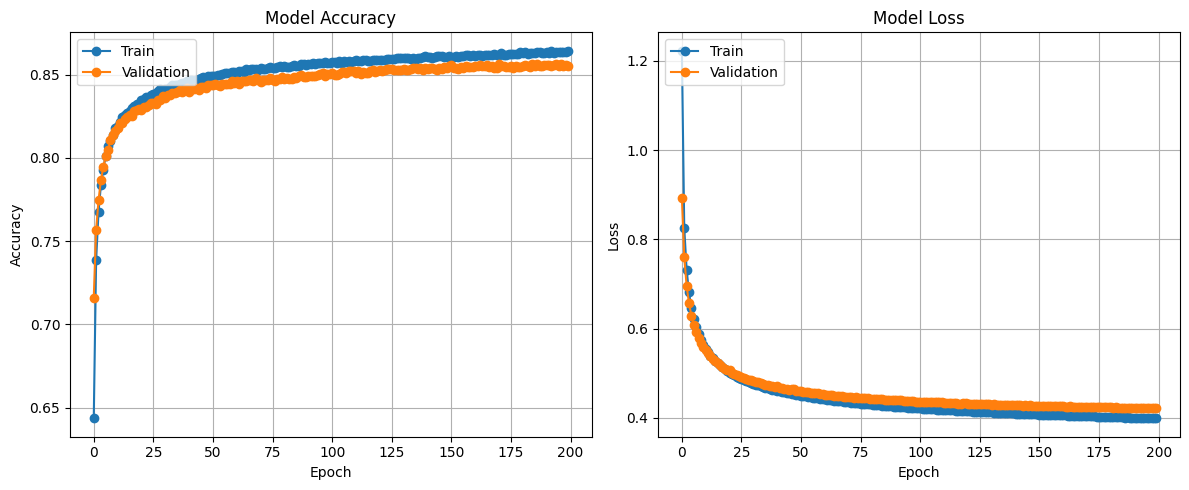

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with specified size
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='o')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8448 - loss: 0.4396
Test accuracy: 0.843500018119812


# Improve neural network accuracy througout hiden layers and different optimizers

Add more robustness to the neural network model by adding hidden layers to improbe its accuracy. Evaluate other options for the optimizer of the model and their impact on accuracy.

In [ ]:
# Let's add some other constants.
# Note I repeted the previous ones for reference

NUM_CLASES=10

# Reshape 28 by 28 pixel images to  flatten array of 784 pixels
RESHAPED = 784

# Number of neurons in a hidden layer
HIDDEN_NEURONS=256

So we will build a neural network with 2 hidden layers activated by relu functions, connected to a last layer with 10 classes that is activated with a softmax function.

In [ ]:
model = Sequential([
    Input(shape=(RESHAPED,)),       # Input layer: expects data of shape (RESHAPED,)
    Dense(HIDDEN_NEURONS, activation='relu'),
    Dense(HIDDEN_NEURONS, activation='relu'),
    Dense(NUM_CLASES, activation='softmax'),  # Output layer with softmax # 'softmax' ensures outputs represent class probabilities (sum = 1)
])
# Compile the model: define how it learns and how performance is measured
model.compile(optimizer='sgd', # Stochastic Gradient Descent optimizer (basic learning algorithm)
              loss='categorical_crossentropy', # Loss function for multi-class classification
              metrics=['accuracy']) # Metric to monitor during training (classification accuracy)
# Display model architecture summary
# Shows layer types, output shapes, and number of trainable parameters
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.save('model.h5')
# we can visualize the Neural Network architecthire in Netron

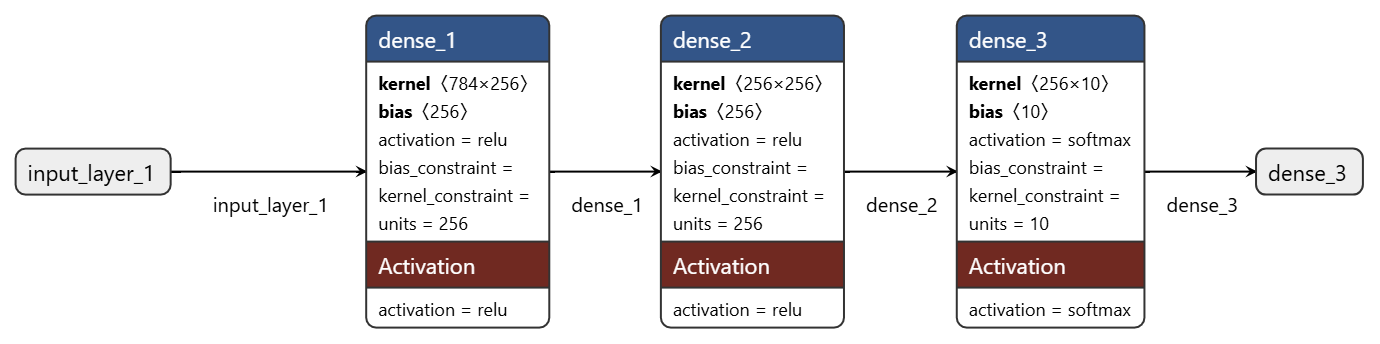

In [ ]:
# Now we have the neural network architecture
# Let's define some training parameters
BATCH_SIZE=128
EPOCHS=200
VALIDATION_SPLIT=0.2

In [ ]:
# Now fit the model
history=model.fit(train_images, train_labels,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8731 - loss: 0.3678 - val_accuracy: 0.8629 - val_loss: 0.3851
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8727 - loss: 0.3652 - val_accuracy: 0.8619 - val_loss: 0.3976
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8726 - loss: 0.3660 - val_accuracy: 0.8666 - val_loss: 0.3808
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8762 - loss: 0.3619 - val_accuracy: 0.8657 - val_loss: 0.3816
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8749 - loss: 0.3556 - val_accuracy: 0.8677 - val_loss: 0.3780
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8764 - loss: 0.3506 - val_accuracy: 0.8624 - val_loss: 0.3986
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8753 - loss: 0.3516 - val_accuracy: 0.8682 - val_loss: 0.3747
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8758 - loss: 0.3469 - val_accu

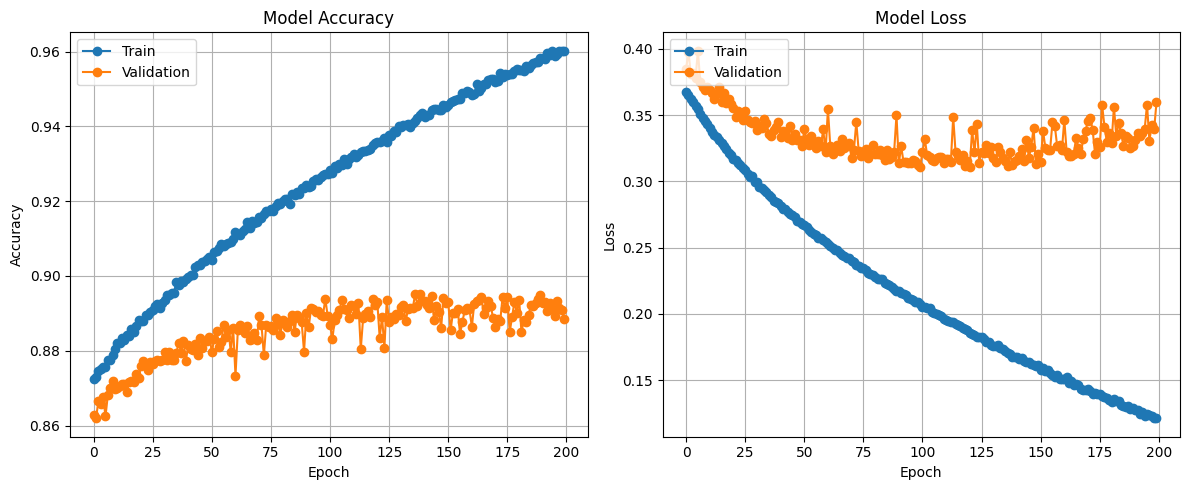

In [ ]:
# Let's see how the model did during each epoch
import matplotlib.pyplot as plt

# Create a figure with specified size
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='o')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# and let's evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8835 - loss: 0.3771
Test accuracy: 0.8809000253677368


We can see the model seems to overfit as the accuracy is larger for the training set.

# MODEL WITH RMSProp OPTIMIZER

In [ ]:
model = Sequential([
    Input(shape=(RESHAPED,)),       # Input layer: expects data of shape (RESHAPED,)
    Dense(HIDDEN_NEURONS, activation='relu'),
    Dense(HIDDEN_NEURONS, activation='relu'),
    Dense(NUM_CLASES, activation='softmax'),  # Output layer with softmax # 'softmax' ensures outputs represent class probabilities (sum = 1)
])
# Compile the model: define how it learns and how performance is measured
model.compile(optimizer='RMSProp', # RMSProp optimizer: adapts the learning rate for each parameter
              loss='categorical_crossentropy', # Loss function for multi-class classification
              metrics=['accuracy']) # Metric to monitor during training (classification accuracy)
# Display model architecture summary
# Shows layer types, output shapes, and number of trainable parameters
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(train_images, train_labels,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7230 - loss: 0.7657 - val_accuracy: 0.8418 - val_loss: 0.4294
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8544 - loss: 0.3959 - val_accuracy: 0.8358 - val_loss: 0.4500
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8695 - loss: 0.3534 - val_accuracy: 0.8752 - val_loss: 0.3458
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8826 - loss: 0.3169 - val_accuracy: 0.8726 - val_loss: 0.3445
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8895 - loss: 0.2887 - val_accuracy: 0.8779 - val_loss: 0.3442
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8955 - loss: 0.2810 - val_accuracy: 0.8817 - val_loss: 0.3330
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8995 - loss: 0.2659 - val_accuracy: 0.8875 - val_loss: 0.3279
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9043 - loss: 0.2564 - val_accu

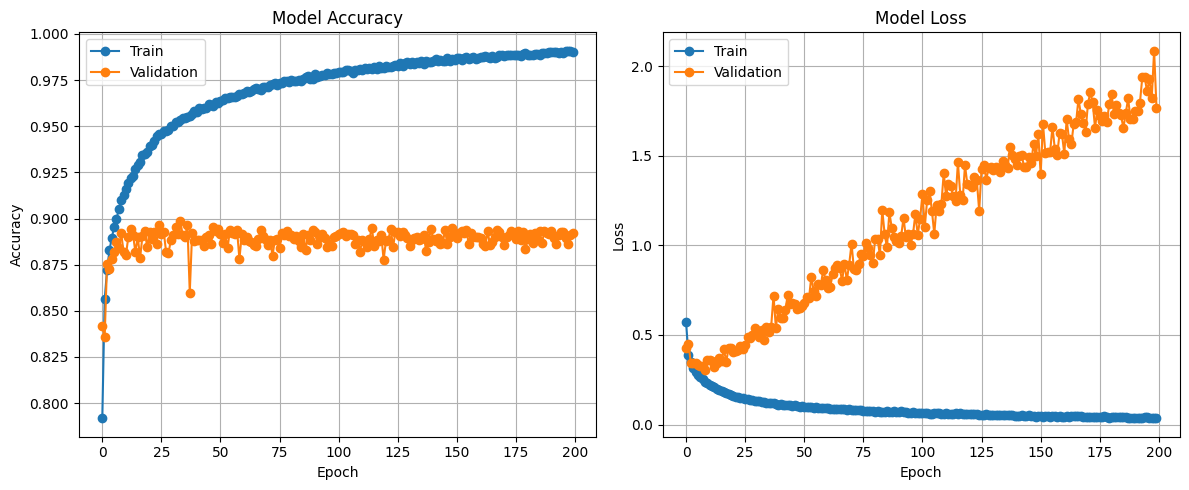

In [ ]:
# Let's see how the model did during each epoch
import matplotlib.pyplot as plt

# Create a figure with specified size
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='o')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='o')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# and let's evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8912 - loss: 1.9578
Test accuracy: 0.891700029373169


The accuracy seems the same as before. We see also that the model is overfitting. Probably we need to add some regularization and tune the parameters.

# Model with ADAM optimizer


In [ ]:
# For the moment we keep all the same and we just vary the optimizer
model = Sequential([
    Input(shape=(RESHAPED,)),       # Input layer: expects data of shape (RESHAPED,)
    Dense(HIDDEN_NEURONS, activation='relu'),
    Dense(HIDDEN_NEURONS, activation='relu'),
    Dense(NUM_CLASES, activation='softmax'),  # Output layer with softmax # 'softmax' ensures outputs represent class probabilities (sum = 1)
])
# Compile the model: define how it learns and how performance is measured
model.compile(optimizer='Adam', # RMSProp optimizer: adapts the learning rate for each parameter
              loss='categorical_crossentropy', # Loss function for multi-class classification
              metrics=['accuracy']) # Metric to monitor during training (classification accuracy)
# Display model architecture summary
# Shows layer types, output shapes, and number of trainable parameters
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(train_images, train_labels,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7570 - loss: 0.7030 - val_accuracy: 0.8259 - val_loss: 0.4604
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8612 - loss: 0.3847 - val_accuracy: 0.8608 - val_loss: 0.3715
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8754 - loss: 0.3371 - val_accuracy: 0.8709 - val_loss: 0.3631
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8867 - loss: 0.3081 - val_accuracy: 0.8696 - val_loss: 0.3580
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8904 - loss: 0.2929 - val_accuracy: 0.8857 - val_loss: 0.3207
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8985 - loss: 0.2723 - val_accuracy: 0.8849 - val_loss: 0.3127
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9035 - loss: 0.2594 - val_accuracy: 0.8872 - val_loss: 0.3118
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9072 - loss: 0.2463 - val_accu

In [ ]:
# We can practice the creation of functions
# This function helps to plot model loss and accuracy
import matplotlib.pyplot as plt

def plot_training_history(history):
    """Plot training and validation accuracy and loss from a Keras History object."""

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], marker='o', label='Train')
    plt.plot(history.history['val_accuracy'], marker='o', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], marker='o', label='Train')
    plt.plot(history.history['val_loss'], marker='o', label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


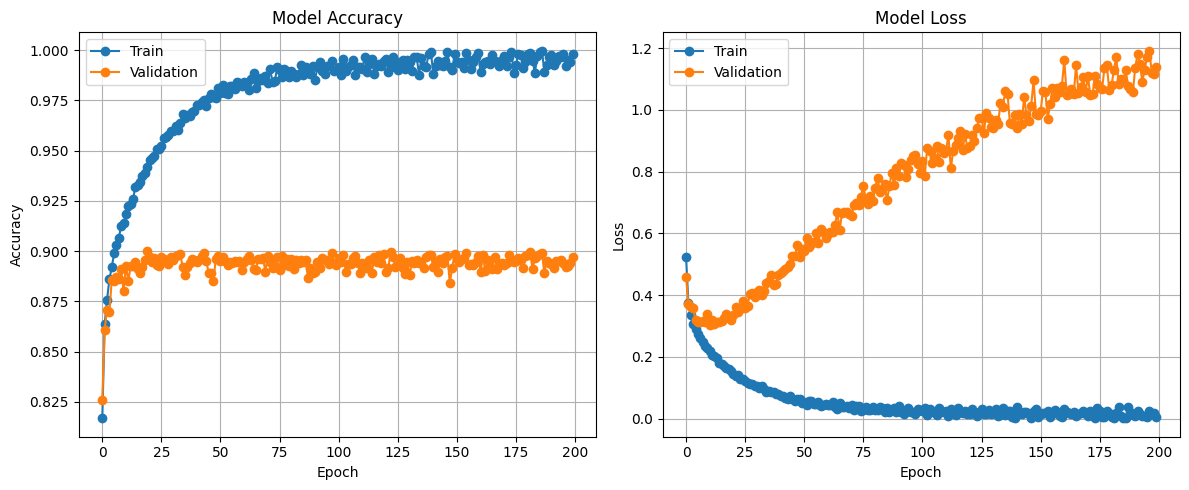

In [ ]:
plot_training_history(history)

In [ ]:
# and let's evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8904 - loss: 1.2947
Test accuracy: 0.8903999924659729


We see that we reached a limit of less than 90% test accuracy. As well as overfitting as no futher refinements were applied.

Additionally, with this method we treat images as flat vectors instead of a matrix of pixels so the model does not learn patterns and spatial relationships.

### 🧠 Understanding Common Optimizers in Neural Networks

Training a neural network involves adjusting its weights to minimize the loss function. This process is guided by an **optimizer**, which determines *how* the model updates its parameters based on the gradient of the loss. Below are the most common optimizers and how they differ.

---

#### **1. Stochastic Gradient Descent (SGD)**
SGD is the foundational optimization algorithm. It updates weights by moving them slightly in the direction opposite to the gradient of the loss.  
While simple and effective, its main limitation is that it uses a **fixed learning rate**, which may make convergence slow or unstable.

- **Pros:** Simple, easy to implement, and well-understood.
- **Cons:** Sensitive to the choice of learning rate; can get stuck in local minima.
- **Best for:** Large, smooth datasets where gradients are stable.

---

#### **2. Momentum**
Momentum improves upon SGD by adding a term that “remembers” past gradients. This helps the optimizer accelerate in consistent directions and dampen oscillations.

- **Intuition:** Like rolling a ball down a hill—it gains momentum and keeps moving through small bumps.
- **Pros:** Faster convergence and smoother updates.
- **Cons:** Still requires careful tuning of learning rate and momentum parameter.

---

#### **3. RMSProp (Root Mean Square Propagation)**
RMSProp adapts the learning rate for each parameter individually based on the average of recent squared gradients.  
This makes it well-suited for problems with **non-stationary objectives**, such as recurrent neural networks or noisy datasets.

- **Pros:** Automatically adjusts learning rates; good for non-stationary data.
- **Cons:** Learning rate still needs fine-tuning.
- **Best for:** Recurrent models or time-series problems.

---

#### **4. Adam (Adaptive Moment Estimation)**
Adam combines the strengths of both **Momentum** and **RMSProp**. It keeps track of an exponentially decaying average of both gradients and squared gradients.  
This allows Adam to adaptively adjust learning rates for each parameter, leading to fast and stable convergence.

- **Pros:** Usually works well out of the box; requires little tuning.
- **Cons:** Can sometimes overfit or converge to suboptimal solutions in some tasks.
- **Best for:** Most deep learning applications (CNNs, RNNs, transformers).

---

#### **5. AdaGrad**
AdaGrad adapts learning rates based on the historical sum of squared gradients. It gives frequent parameters smaller updates and infrequent ones larger updates.  
However, because the learning rate keeps shrinking over time, it can eventually become too small for continued learning.

- **Pros:** Good for sparse data (e.g., text, NLP).
- **Cons:** Learning rate decreases too aggressively over time.

---

#### **6. AdaDelta**
AdaDelta was developed to overcome AdaGrad’s diminishing learning rate problem. It limits the window of past gradients considered, keeping updates more consistent over time.

- **Pros:** More stable than AdaGrad; no need to manually set an initial learning rate.
- **Cons:** Slightly more computational overhead.

---

### ⚖️ Summary Table

| Optimizer | Adapts Learning Rate | Uses Momentum | Common Use Case |
|------------|----------------------|----------------|------------------|
| **SGD** | ❌ | Optional | Simple models, stable datasets |
| **Momentum** | ❌ | ✅ | Deep networks, smoother updates |
| **RMSProp** | ✅ | ✅ (implicit) | RNNs, non-stationary data |
| **Adam** | ✅ | ✅ | General-purpose, fast convergence |
| **AdaGrad** | ✅ | ❌ | Sparse data, text |
| **AdaDelta** | ✅ | ❌ | Long training tasks with varied data |

---

### 🧩 In Practice
- **Adam** is often the best starting point — it’s efficient and robust.
- **RMSProp** is preferred for sequence-based tasks.
- **SGD with momentum** can outperform adaptive methods when finely tuned, especially in large-scale image classification.

Each optimizer has its own strengths, and understanding their behavior helps you choose the right one for your model and dataset.


## Optional exercise

Ok we accept to train the model as flat vectors. Let's see what techniques we ca use to improve the last one.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Define the model with regularization and dropout
model = Sequential([
    Input(shape=(RESHAPED,)),
    Dense(HIDDEN_NEURONS, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization (weight decay)
    Dropout(0.3),  # Randomly drops 30% of neurons during training

    Dense(HIDDEN_NEURONS, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)),  # L2 again to limit overfitting
    Dropout(0.3),  # Helps reduce co-adaptation

    Dense(NUM_CLASES, activation='softmax')  # Output layer for 10-class classification
])

# Compile the model
model.compile(optimizer='Adam',                # Adaptive optimizer with momentum
              loss='categorical_crossentropy', # Suitable for multi-class tasks
              metrics=['accuracy'])            # Track accuracy during training

# Display model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping callback: stops training when validation loss stops improving
early_stop = EarlyStopping(
    monitor='val_loss',        # Watch the validation loss
    patience=5,                # Stop if it hasn't improved for 5 epochs
    restore_best_weights=True  # Roll back to the best weights
)

# Train the model with early stopping
history = model.fit(
    train_images, train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    callbacks=[early_stop]     # Add early stopping here
)


Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6929 - loss: 1.3497 - val_accuracy: 0.8337 - val_loss: 0.7471
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8317 - loss: 0.7293 - val_accuracy: 0.8462 - val_loss: 0.6173
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8407 - loss: 0.6201 - val_accuracy: 0.8574 - val_loss: 0.5440
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8537 - loss: 0.5544 - val_accuracy: 0.8634 - val_loss: 0.5057
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8541 - loss: 0.5312 - val_accuracy: 0.8618 - val_loss: 0.4924
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8584 - loss: 0.5090 - val_accuracy: 0.8656 - val_loss: 0.4828
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8533 - loss: 0.5111 - val_accuracy: 0.8583 - val_loss: 0.4917
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8573 - loss: 0.5009 - val_accu

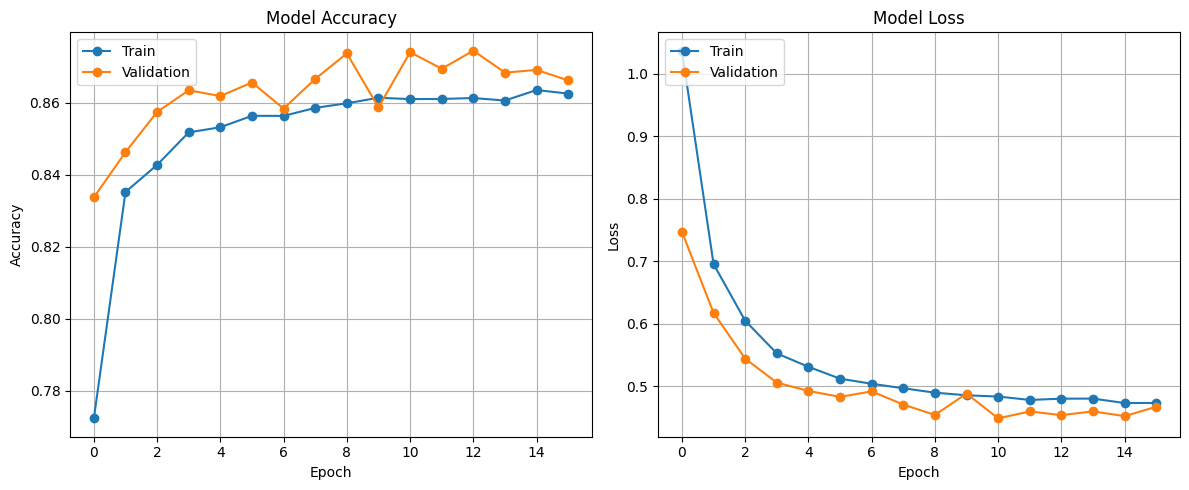

In [ ]:
plot_training_history(history)

## Exercise 2
1. Compile and train the model from Task 3 but now using the ‘Nadam’ optimizer.
2. Evaluate the test accuracy of the neural network.
3. Change the architecture of the neural network to have 3 dense layers with 512, 256, and 128 neurons each. The activation function for each neuron should still be “ReLu”. The output layer should still have 10 neurons without any changes.
4. Compile and train the model using the ‘Nadam’ optimizer.
5. Evaluate the test accuracy of the new neural network.

In [ ]:
# For the moment we keep all the same and we just vary the optimizer
model = Sequential([
    Input(shape=(RESHAPED,)),       # Input layer: expects data of shape (RESHAPED,)
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(NUM_CLASES, activation='softmax'),  # Output layer with softmax # 'softmax' ensures outputs represent class probabilities (sum = 1)
])
# Compile the model: define how it learns and how performance is measured
model.compile(optimizer='Nadam', # RMSProp optimizer: adapts the learning rate for each parameter
              loss='categorical_crossentropy', # Loss function for multi-class classification
              metrics=['accuracy']) # Metric to monitor during training (classification accuracy)
# Display model architecture summary
# Shows layer types, output shapes, and number of trainable parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(train_images, train_labels,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7672 - loss: 0.6799 - val_accuracy: 0.8616 - val_loss: 0.3821
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8685 - loss: 0.3558 - val_accuracy: 0.8708 - val_loss: 0.3497
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8876 - loss: 0.3050 - val_accuracy: 0.8810 - val_loss: 0.3274
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8950 - loss: 0.2810 - val_accuracy: 0.8884 - val_loss: 0.3080
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9008 - loss: 0.2624 - val_accuracy: 0.8938 - val_loss: 0.3022
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9057 - loss: 0.2491 - val_accuracy: 0.8853 - val_loss: 0.3218
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9131 - loss: 0.2341 - val_accuracy: 0.8736 - val_loss: 0.3608
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9135 - loss: 0.2296 - val_accu

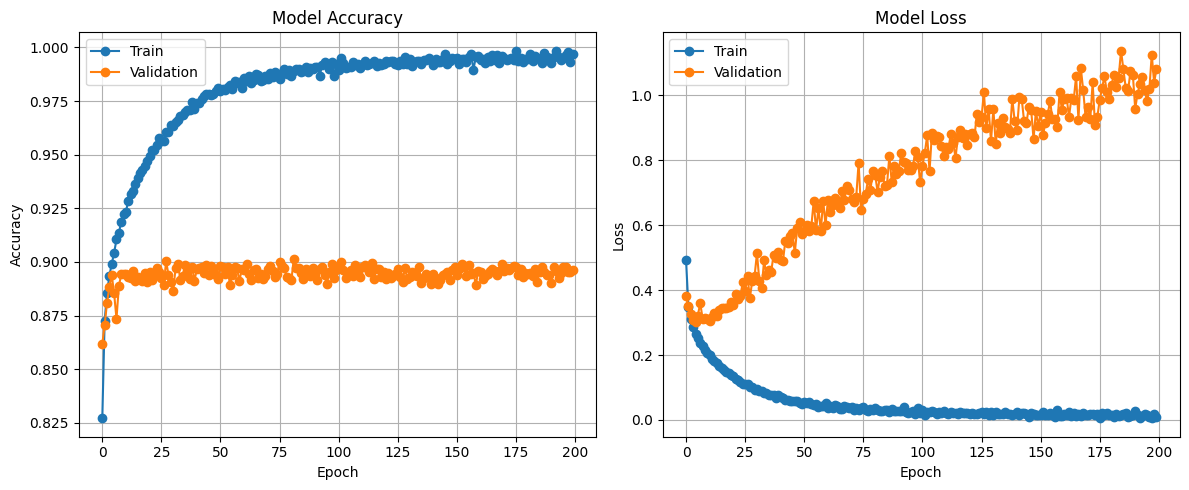

In [ ]:
plot_training_history(history)

In [ ]:
# and let's evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8897 - loss: 1.1346
Test accuracy: 0.8927000164985657


# Module 3

So far we have compiled the network, now we want also to have a visual representation of the results.

In [ ]:
# LEt's import the required libraries
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# Let's define some parameters, the image dimensions
IMG_ROWS=28
IMG_COLS=28

In [ ]:
# First we see we have the test and train labels one-hot encoded
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
# So to bribg them back we can use np.argmax()
np.argmax(train_labels[0])

np.int64(9)

In [ ]:
# We can create a dictionary to identify each label
labels={0:'T-shirt/top',
        1:'Trouser',
        2:'Pullover',
        3:'Dress',
        4:'Coat',
        5:'Sandal',
        6:'Shirt',
        7:'Sneaker',
        8:'Bag',
        9: 'Ankle Boot'}

In [ ]:
labels[0]

'T-shirt/top'

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


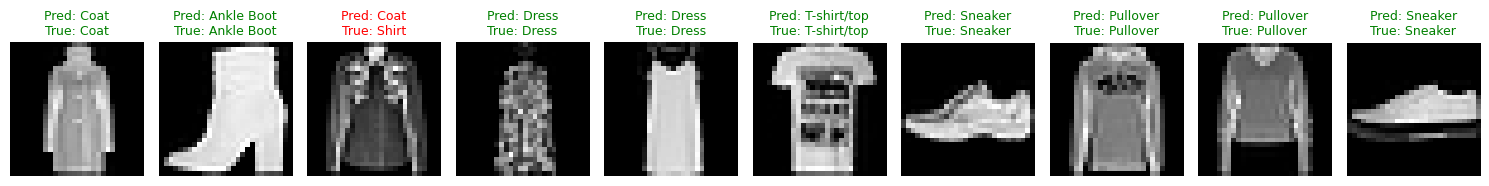

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions
predictions = model.predict(test_images)

# Convert one-hot encoded labels to class indices
y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Plot random test images with predicted and true class names
num_images = 10
indices = np.random.choice(len(test_images), num_images, replace=False)

plt.figure(figsize=(15, 4))

for i, idx in enumerate(indices):
    plt.subplot(1, num_images, i + 1)
    image = test_images[idx].reshape(28, 28)
    plt.imshow(image, cmap='gray')

    true_label = labels[y_true[idx]]
    pred_label = labels[y_pred[idx]]

    color = 'green' if y_true[idx] == y_pred[idx] else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


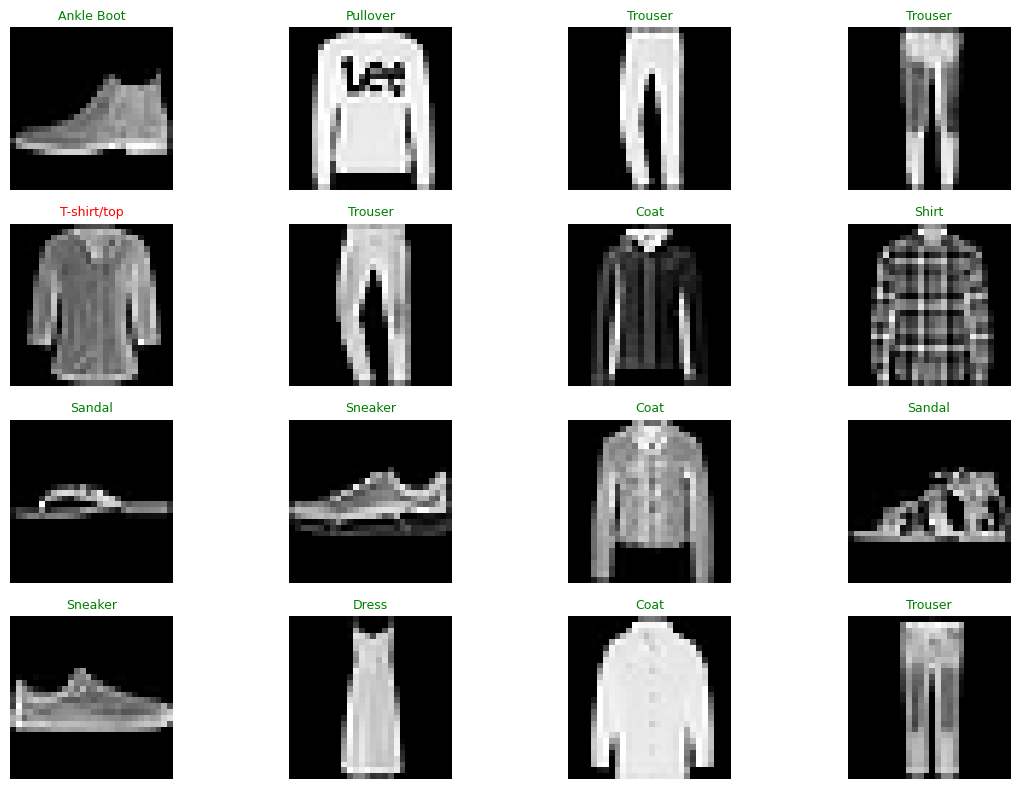

In [ ]:
# Get model predictions (class indices)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Plot a few test images with predicted labels
plt.figure(figsize=(12, 8))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_images[i].reshape(IMG_ROWS, IMG_COLS), cmap='gray')
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(labels[predicted_labels[i]], color=color, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()


We can also split the predicions into correct and incorrect to isolate or identify the objects that the model commonly struggles to properly classify;

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


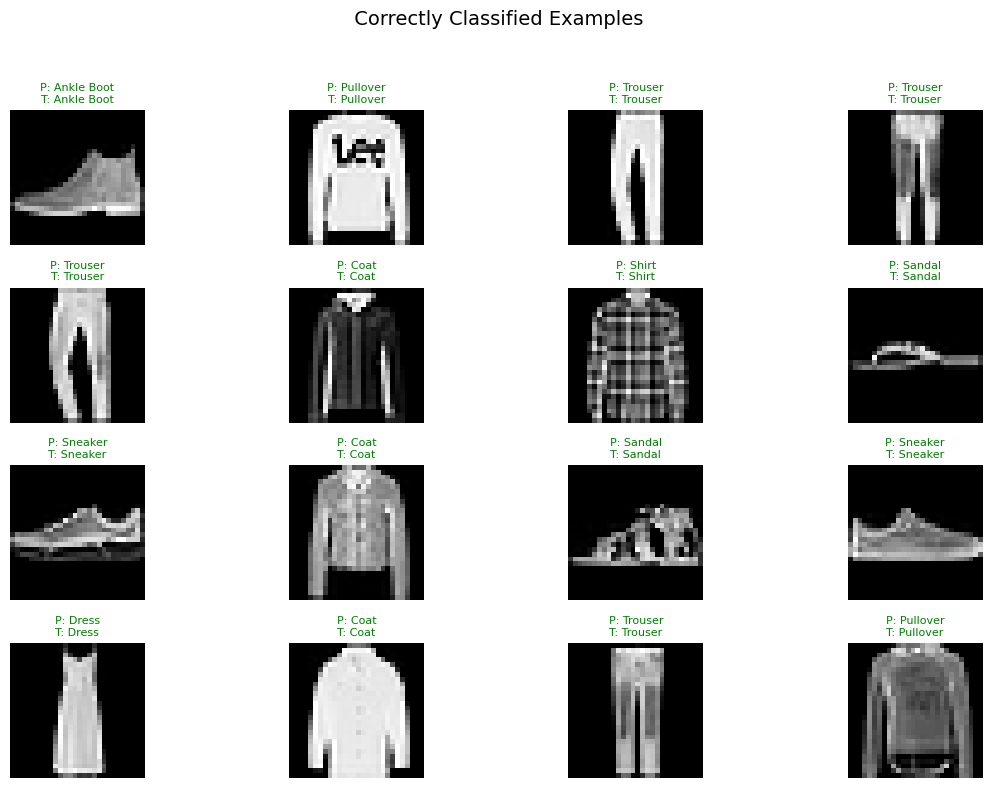

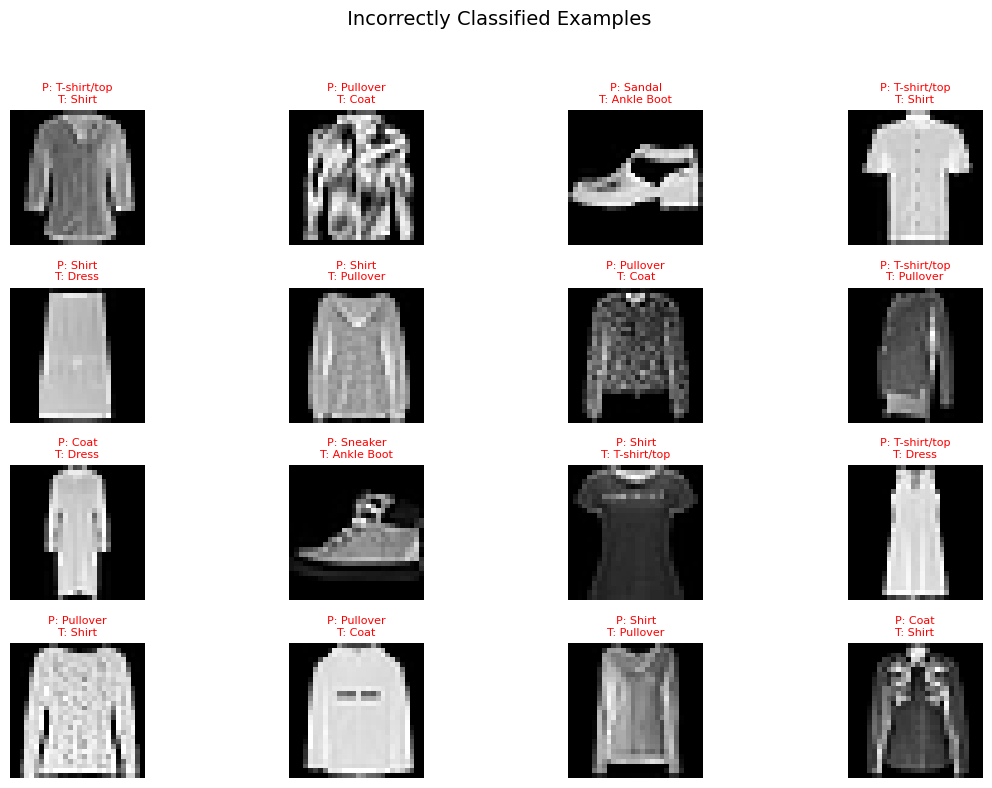

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Get predictions for the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot vectors to label indices
true_labels = np.argmax(test_labels, axis=1)

# 2️⃣ Identify which predictions are correct and which are incorrect
correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# 3️⃣ Select a few examples (up to 16 of each)
correct_samples = correct_indices[:16]
incorrect_samples = incorrect_indices[:16]

# 4️⃣ Function to plot a group of images with their predicted labels
def plot_examples(indices, title):
    plt.figure(figsize=(12, 8))
    plt.suptitle(title, fontsize=14)
    for i, idx in enumerate(indices):
        plt.subplot(4, 4, i + 1)
        plt.imshow(test_images[idx].reshape(IMG_ROWS, IMG_COLS), cmap='gray')
        pred_label = labels[predicted_labels[idx]]
        true_label = labels[true_labels[idx]]
        plt.title(f"P: {pred_label}\nT: {true_label}",
                  color='green' if pred_label == true_label else 'red',
                  fontsize=8)
        plt.axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# 5️⃣ Plot correctly classified images
plot_examples(correct_samples, " Correctly Classified Examples")

# 6️⃣ Plot incorrectly classified images
plot_examples(incorrect_samples, " Incorrectly Classified Examples")


# Module 3

The results obtained highlight the fact that we need another type of neural network. So we will account the spatial relationship between features.

---



In [ ]:
# Import the required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Let's define an auxiliary function that plots the loss function
# and the model accuracy
import matplotlib.pyplot as plt

def plot_training_history(history):
    """Plot training and validation accuracy and loss from a Keras History object."""

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], marker='o', label='Train')
    plt.plot(history.history['val_accuracy'], marker='o', label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], marker='o', label='Train')
    plt.plot(history.history['val_loss'], marker='o', label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
# Let's define some constants for the network as parameters
IMG_ROWS=28
IMG_COLS=28
NUM_CLASES=10
RESHAPED=IMG_ROWS*IMG_COLS
INPUT_SHAPE=(IMG_ROWS, IMG_COLS, 1) # 1 IS THE NMBER OF CHANNELS, B AND WHITE HAVE 1 CHANNEL

In [ ]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
#Split test and train data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Reshape the images, here is different
train_images = train_images.reshape(train_images.shape[0], IMG_ROWS, IMG_COLS, 1)
test_images = test_images.reshape(test_images.shape[0], IMG_ROWS, IMG_COLS, 1)

# We normalize again
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
# Labels have to be one-hot encoded
train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASES)

In [ ]:
# Lets check a one hot encoded feature
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
# Let's create a NN model
# First import the required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Define a CNN model using an explicit Input layer
model = Sequential([
    Input(shape=INPUT_SHAPE),                           # Input layer: expects 28x28 grayscale images
    Conv2D(32, (3, 3), activation='relu', padding='same'),   # First conv layer: 32 filters of size 3x3
    MaxPooling2D((2, 2)),                                   # Downsample the feature maps
    Conv2D(64, (3, 3), activation='relu', padding='same'),   # Second conv layer
    MaxPooling2D((2, 2)),                                   # Pool again
    Conv2D(128, (3, 3), activation='relu', padding='same'),  # Third conv layer (deeper features)
    MaxPooling2D((2, 2)),                                   # Reduce spatial dimensions further
    Flatten(),                                               # Flatten 3D feature maps to 1D vector
    Dense(1024, activation='relu'),                          # Fully connected layer (learns complex patterns)
    Dense(512, activation='relu'),                           # Another dense layer for refinement
    Dense(NUM_CLASES, activation='softmax')                  # Output layer (10 class probabilities)
])

model.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,803,274 (6.88 MB)

 Trainable params: 1,803,274 (6.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Let's compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Finally define the trainig parameters
BATCH_SIZE=128
EPOCHS=50
VALIDATION_SPLIT=0.2

In [ ]:
# And finally, train the model and store the results in history
history = model.fit(train_images, train_labels,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7106 - loss: 0.8024 - val_accuracy: 0.8694 - val_loss: 0.3561
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8833 - loss: 0.3163 - val_accuracy: 0.8988 - val_loss: 0.2735
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9077 - loss: 0.2576 - val_accuracy: 0.9057 - val_loss: 0.2541
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9186 - loss: 0.2181 - val_accuracy: 0.9023 - val_loss: 0.2698
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9260 - loss: 0.1966 - val_accuracy: 0.9176 - val_loss: 0.2227
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9432 - loss: 0.1584 - val_accuracy: 0.9150 - val_loss: 0.2297
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9465 - loss: 0.1459 - val_accuracy: 0.9191 - val_loss: 0.2284
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9531 - loss: 0.1274 - val_accuracy: 0

In [ ]:
# Let's see the results
score=model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6224959492683411
Test accuracy: 0.9136000275611877


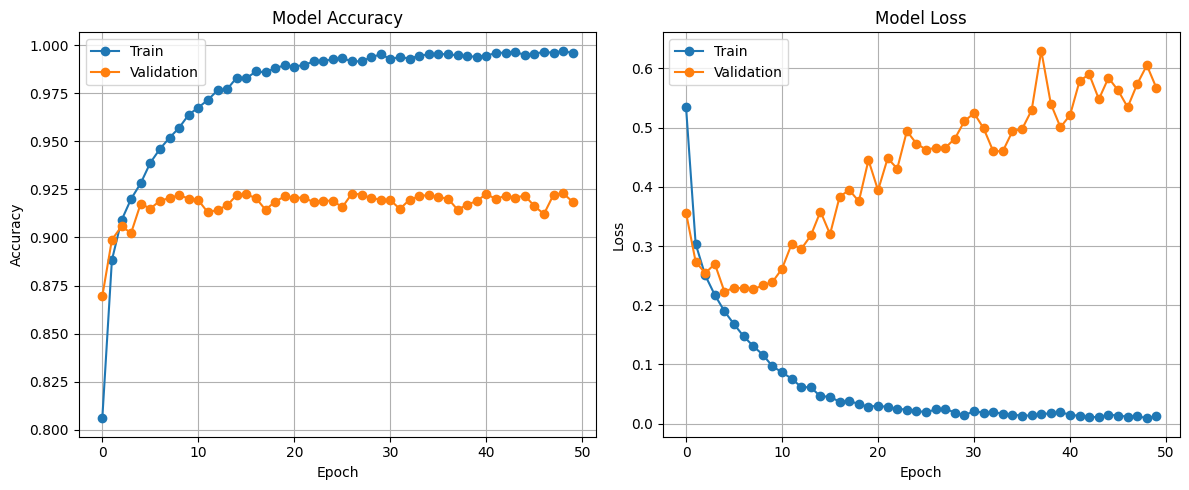

In [ ]:
plot_training_history(history)

We observe that the mode still overfits. The diagram below summatizes the creation of a neural network.

We start with the input layer of images then a set of convuutions with a depth given by the number of filters or kernels. Then we move to pooling, that applies a filter keeping the max values of the pool. We connect more convolution and pooling layers until arriving into a flatten layer where we create a fully connected or dense network that ends up into the classification activated by a soft max function

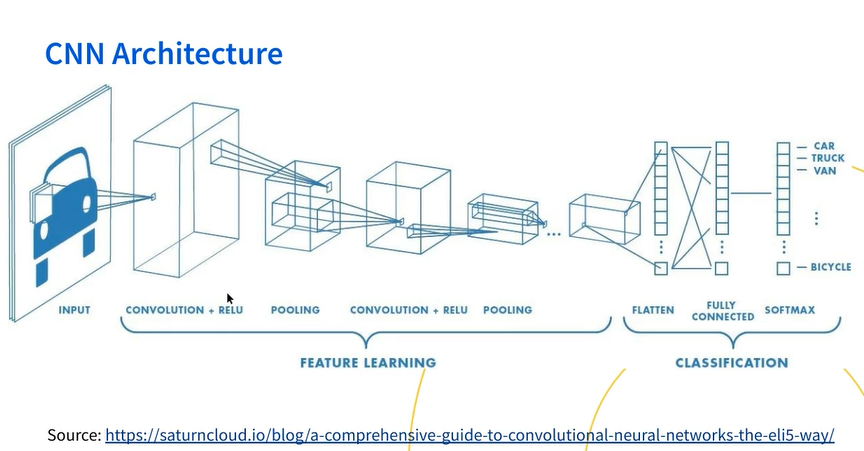

# Module 4

## Reduce overfittinf with ```BatchNormalization```, ```Dropout``` and L2 regularization

We will improve the network performance of our model and avoid overfitting adding several functions as regularizatiom, dropout and batch normalization.

In [ ]:
# Import the required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Let's define some constants for the network as parameters
IMG_ROWS=28
IMG_COLS=28
NUM_CLASES=10
RESHAPED=IMG_ROWS*IMG_COLS
INPUT_SHAPE=(IMG_ROWS, IMG_COLS, 1) # 1 IS THE NMBER OF CHANNELS, B AND WHITE HAVE 1 CHANNEL

In [ ]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
#Split test and train data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

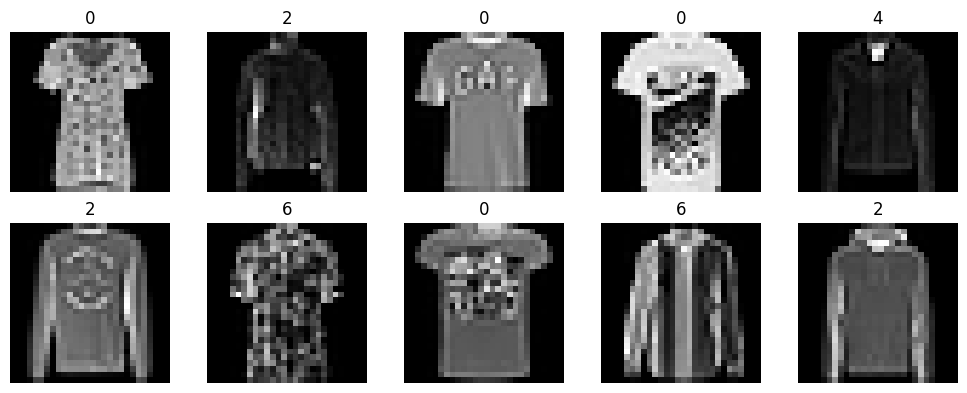

In [ ]:
# Lets visualize some random images

# Select 10 random indices from the training set
random_indices = np.random.randint(0, len(train_images), 10)

plt.figure(figsize=(10, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[idx].reshape(IMG_ROWS, IMG_COLS), cmap='gray')
    plt.title(train_labels[idx])  # Show numeric class label
    plt.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
# Reshape the images, here is different
train_images = train_images.reshape(train_images.shape[0], IMG_ROWS, IMG_COLS, 1)
test_images = test_images.reshape(test_images.shape[0], IMG_ROWS, IMG_COLS, 1)

# We normalize again
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
# Labels have to be one-hot encoded
train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASES)

In [ ]:
# -------------------------------------------
# 1️⃣ Import required libraries
# -------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# -------------------------------------------
# 2️⃣ Define whether to use L2 regularization
# -------------------------------------------
use_l2_reg = True         # Set to False to disable L2 regularization
l2_loss_lambda = 0.00025  # Regularization strength (λ)

# Conditional definition of the regularizer:
# We only create an L2 regularizer object if use_l2_reg=True
# Otherwise, l2 = None (no regularization applied)
l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None

if l2 is not None:
    print(f"✅ Using L2 regularization with lambda={l2_loss_lambda}")
else:
    print("⚠️  No L2 regularization applied.")

# -------------------------------------------
# 3️⃣ Define the CNN architecture
# -------------------------------------------
model = Sequential([
    Input(shape=INPUT_SHAPE),  # Input layer: expects 28x28 grayscale images

    # Convolutional block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.15),  # Randomly drop 20% of neurons to reduce overfitting

    # Convolutional block 2
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Convolutional block 3
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Flatten the 3D feature maps into 1D
    Flatten(),

    # Fully connected layers
    Dense(1024, activation='relu', kernel_regularizer=l2),
    Dropout(0.4),

    Dense(512, activation='relu', kernel_regularizer=l2),
    Dropout(0.2),

    # Output layer: one neuron per class (10 classes, softmax gives probabilities)
    Dense(NUM_CLASES, activation='softmax')
])

# -------------------------------------------
# 4️⃣ Display model summary
# -------------------------------------------
model.summary()

# To turn off a regularizer we make
# kernel_regularizer=None


✅ Using L2 regularization with lambda=0.00025


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,804,170 (6.88 MB)

 Trainable params: 1,803,722 (6.88 MB)

 Non-trainable params: 448 (1.75 KB)

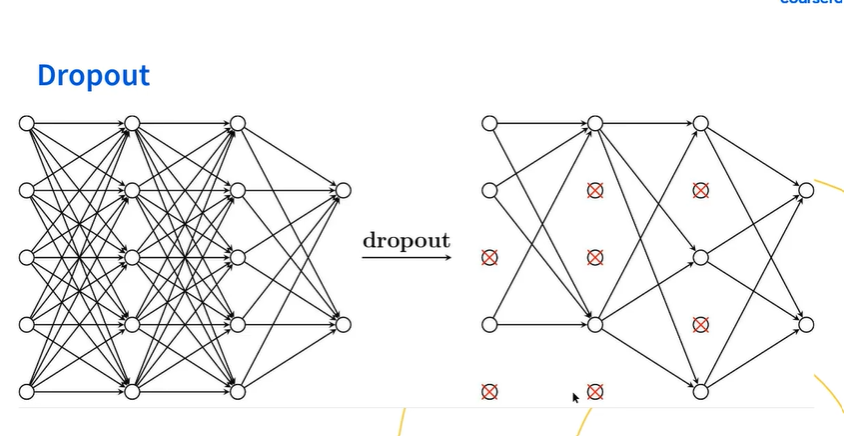

WE see that dropout makes we ignore a percentage of layer neurons. We drop some neurons while adjusting the weights. This improve the pedicions on unseen data and reduces overfitting.

In [ ]:
# Let's compile the model
adam=Adam(learning_rate=0.0001)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Finally define the trainig parameters
BATCH_SIZE=128
EPOCHS=50
VALIDATION_SPLIT=0.2

In [ ]:
# And finally, train the model and store the results in history
history = model.fit(train_images, train_labels,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.6972 - loss: 1.4213 - val_accuracy: 0.4502 - val_loss: 2.1953
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8557 - loss: 0.7830 - val_accuracy: 0.8935 - val_loss: 0.6230
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8806 - loss: 0.6389 - val_accuracy: 0.9059 - val_loss: 0.5362
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8931 - loss: 0.5471 - val_accuracy: 0.9065 - val_loss: 0.4846
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9014 - loss: 0.4911 - val_accuracy: 0.9094 - val_loss: 0.4476
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9051 - loss: 0.4529 - val_accuracy: 0.8690 - val_loss: 0.5248
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9080 - loss: 0.4294 - val_accuracy: 0.9174 - val_loss: 0.4046
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9163 - loss: 0.4112 - val_accuracy:

In [ ]:
score=model.evaluate(test_images,test_labels,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.3925902247428894
Test accuracy: 0.9222000241279602


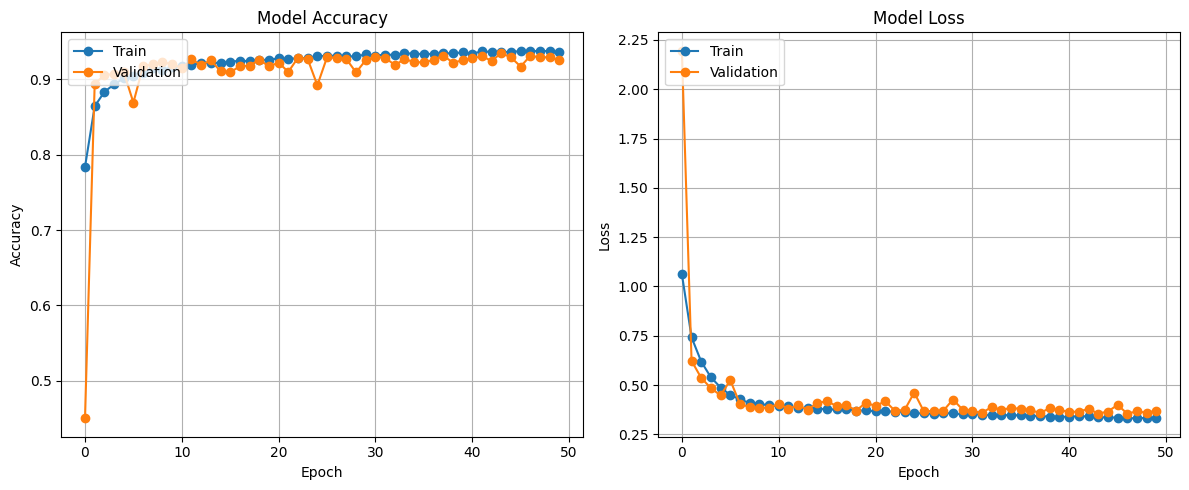

In [ ]:
plot_training_history(history)

The model looks better and we do not see overfitting

## Exercise
1. Define a build function with only L2 regularization and no Dropout layers.
2. Change the value of lambda to 0.0015.
3. Obtain the test accuracy of this model.
4. Re-define the build function to only include Dropout without L2 regularization.
5. Obtain the test accuracy of this model.
6. Include both L2 regularization and Dropout in the model using lambda = 0.0015 and keep the dropout values from Task 6.

✅ Using L2 regularization with lambda=0.0015


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,804,170 (6.88 MB)

 Trainable params: 1,803,722 (6.88 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7968 - loss: 2.6382 - val_accuracy: 0.6165 - val_loss: 1.8842
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9015 - loss: 0.7960 - val_accuracy: 0.8770 - val_loss: 0.6127
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9141 - loss: 0.4862 - val_accuracy: 0.8652 - val_loss: 0.5558
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9200 - loss: 0.3988 - val_accuracy: 0.8924 - val_loss: 0.4547
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9260 - loss: 0.3507 - val_accuracy: 0.9068 - val_loss: 0.4007
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9281 - loss: 0.3372 - val_accuracy: 0.9014 - val_loss: 0.4041
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9323 - loss: 0.3241 - val_accuracy: 0.9107 - val_loss: 0.3767
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9372 - loss: 0.3011 - val_accuracy

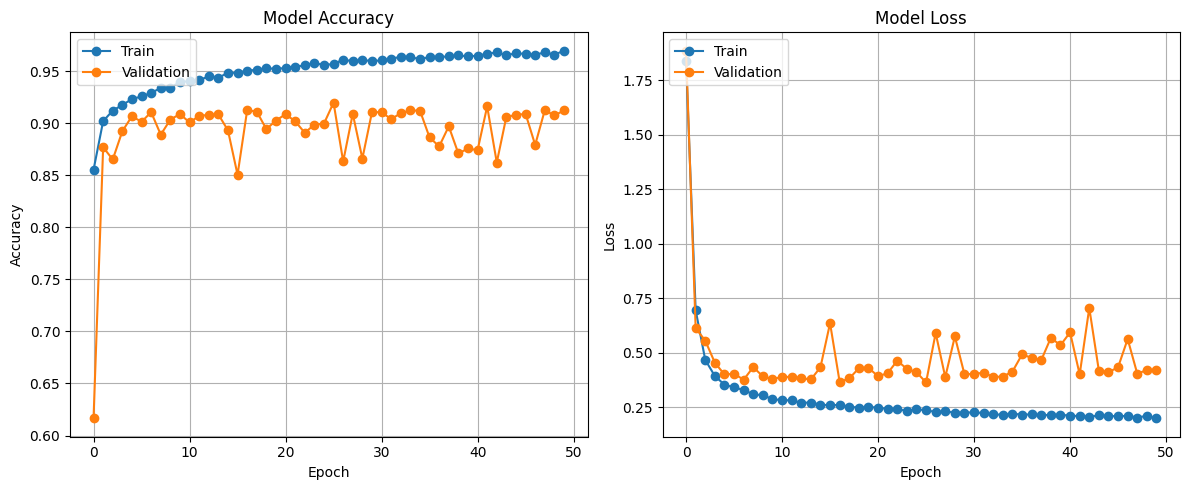

In [ ]:
# MODEL 1 WITHOUT DROPOUT
# -------------------------------------------
# 1️⃣ Import required libraries
# -------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# -------------------------------------------
# 2️⃣ Define whether to use L2 regularization
# -------------------------------------------
use_l2_reg = True         # Set to False to disable L2 regularization
l2_loss_lambda = 0.0015  # Regularization strength (λ)

# Conditional definition of the regularizer:
# We only create an L2 regularizer object if use_l2_reg=True
# Otherwise, l2 = None (no regularization applied)
l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None

if l2 is not None:
    print(f"✅ Using L2 regularization with lambda={l2_loss_lambda}")
else:
    print("⚠️  No L2 regularization applied.")

# -------------------------------------------
# 3️⃣ Define the CNN architecture
# -------------------------------------------
model = Sequential([
    Input(shape=INPUT_SHAPE),  # Input layer: expects 28x28 grayscale images

    # Convolutional block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    #Dropout(0.15),  # Randomly drop 20% of neurons to reduce overfitting

    # Convolutional block 2
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    #Dropout(0.2),

    # Convolutional block 3
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    #Dropout(0.3),

    # Flatten the 3D feature maps into 1D
    Flatten(),

    # Fully connected layers
    Dense(1024, activation='relu', kernel_regularizer=l2),
    #Dropout(0.4),

    Dense(512, activation='relu', kernel_regularizer=l2),
    #Dropout(0.2),

    # Output layer: one neuron per class (10 classes, softmax gives probabilities)
    Dense(NUM_CLASES, activation='softmax')
])

# -------------------------------------------
# 4️⃣ Display model summary
# -------------------------------------------
model.summary()

# To turn off a regularizer we make
# kernel_regularizer=None


# Let's compile the model
adam=Adam(learning_rate=0.0001)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# And finally, train the model and store the results in history
history = model.fit(train_images, train_labels,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=VALIDATION_SPLIT)


score=model.evaluate(test_images,test_labels,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

plot_training_history(history)

Model 2, no L2 regulaization, including dropout

✅ Using L2 regularization with lambda=0.0015


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,804,170 (6.88 MB)

 Trainable params: 1,803,722 (6.88 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7094 - loss: 0.8763 - val_accuracy: 0.5953 - val_loss: 1.4080
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8516 - loss: 0.3946 - val_accuracy: 0.8820 - val_loss: 0.3229
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8799 - loss: 0.3266 - val_accuracy: 0.8949 - val_loss: 0.2883
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8928 - loss: 0.2918 - val_accuracy: 0.9057 - val_loss: 0.2501
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8961 - loss: 0.2822 - val_accuracy: 0.9058 - val_loss: 0.2612
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9036 - loss: 0.2597 - val_accuracy: 0.8932 - val_loss: 0.2777
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9099 - loss: 0.2409 - val_accuracy: 0.9082 - val_loss: 0.2489
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9123 - loss: 0.2365 - val_accuracy:

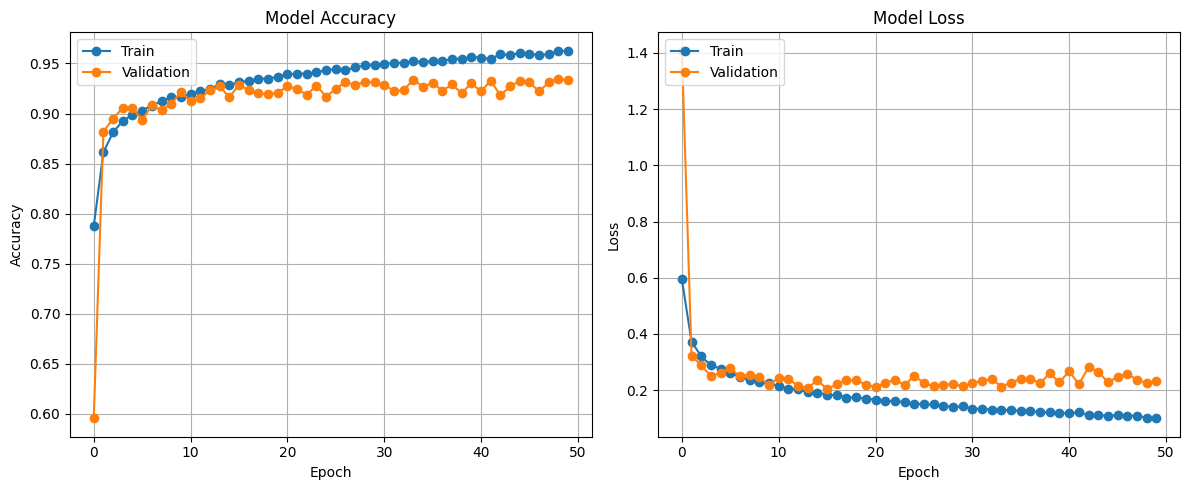

In [ ]:
# -------------------------------------------
# 1️⃣ Import required libraries
# -------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# -------------------------------------------
# 2️⃣ Define whether to use L2 regularization
# -------------------------------------------
use_l2_reg = True         # Set to False to disable L2 regularization
l2_loss_lambda = 0.0015  # Regularization strength (λ)

# Conditional definition of the regularizer:
# We only create an L2 regularizer object if use_l2_reg=True
# Otherwise, l2 = None (no regularization applied)
l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None

if l2 is not None:
    print(f"✅ Using L2 regularization with lambda={l2_loss_lambda}")
else:
    print("⚠️  No L2 regularization applied.")

# -------------------------------------------
# 3️⃣ Define the CNN architecture
# -------------------------------------------
model = Sequential([
    Input(shape=INPUT_SHAPE),  # Input layer: expects 28x28 grayscale images

    # Convolutional block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=None),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.15),  # Randomly drop 20% of neurons to reduce overfitting

    # Convolutional block 2
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=None),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Convolutional block 3
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=None),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Flatten the 3D feature maps into 1D
    Flatten(),

    # Fully connected layers
    Dense(1024, activation='relu', kernel_regularizer=None),
    Dropout(0.4),

    Dense(512, activation='relu', kernel_regularizer=None),
    Dropout(0.2),

    # Output layer: one neuron per class (10 classes, softmax gives probabilities)
    Dense(NUM_CLASES, activation='softmax')
])

# -------------------------------------------
# 4️⃣ Display model summary
# -------------------------------------------
model.summary()

# To turn off a regularizer we make
# kernel_regularizer=None


# Let's compile the model
adam=Adam(learning_rate=0.0001)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# And finally, train the model and store the results in history
history = model.fit(train_images, train_labels,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=VALIDATION_SPLIT)


score=model.evaluate(test_images,test_labels,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

plot_training_history(history)

✅ Using L2 regularization with lambda=0.0015


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,804,170 (6.88 MB)

 Trainable params: 1,803,722 (6.88 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7091 - loss: 3.2469 - val_accuracy: 0.5395 - val_loss: 2.5720
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8614 - loss: 1.1741 - val_accuracy: 0.8587 - val_loss: 0.8119
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8781 - loss: 0.7109 - val_accuracy: 0.8932 - val_loss: 0.5817
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8865 - loss: 0.5782 - val_accuracy: 0.9011 - val_loss: 0.5181
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8923 - loss: 0.5320 - val_accuracy: 0.8939 - val_loss: 0.4976
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8953 - loss: 0.5102 - val_accuracy: 0.8993 - val_loss: 0.5135
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8989 - loss: 0.5050 - val_accuracy: 0.9026 - val_loss: 0.4802
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9005 - loss: 0.4988 - val_accuracy: 

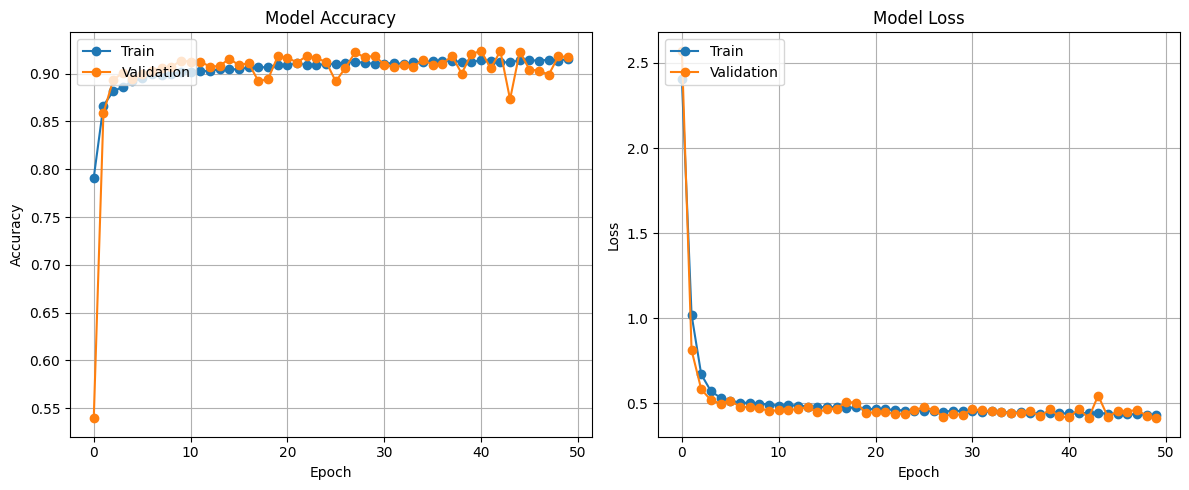

In [ ]:
# MODEL 3 WITH DROPOUT AND BATCH NORMALIZATION CHANGING LAMBDA OF L2 ONLY
# -------------------------------------------
# 1️⃣ Import required libraries
# -------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# -------------------------------------------
# 2️⃣ Define whether to use L2 regularization
# -------------------------------------------
use_l2_reg = True         # Set to False to disable L2 regularization
l2_loss_lambda = 0.0015  # Regularization strength (λ)

# Conditional definition of the regularizer:
# We only create an L2 regularizer object if use_l2_reg=True
# Otherwise, l2 = None (no regularization applied)
l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None

if l2 is not None:
    print(f"✅ Using L2 regularization with lambda={l2_loss_lambda}")
else:
    print("⚠️  No L2 regularization applied.")

# -------------------------------------------
# 3️⃣ Define the CNN architecture
# -------------------------------------------
model = Sequential([
    Input(shape=INPUT_SHAPE),  # Input layer: expects 28x28 grayscale images

    # Convolutional block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.15),  # Randomly drop 20% of neurons to reduce overfitting

    # Convolutional block 2
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Convolutional block 3
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Flatten the 3D feature maps into 1D
    Flatten(),

    # Fully connected layers
    Dense(1024, activation='relu', kernel_regularizer=l2),
    Dropout(0.4),

    Dense(512, activation='relu', kernel_regularizer=l2),
    Dropout(0.2),

    # Output layer: one neuron per class (10 classes, softmax gives probabilities)
    Dense(NUM_CLASES, activation='softmax')
])

# -------------------------------------------
# 4️⃣ Display model summary
# -------------------------------------------
model.summary()

# To turn off a regularizer we make
# kernel_regularizer=None


# Let's compile the model
adam=Adam(learning_rate=0.0001)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# And finally, train the model and store the results in history
history = model.fit(train_images, train_labels,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=VALIDATION_SPLIT)


score=model.evaluate(test_images,test_labels,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

plot_training_history(history)

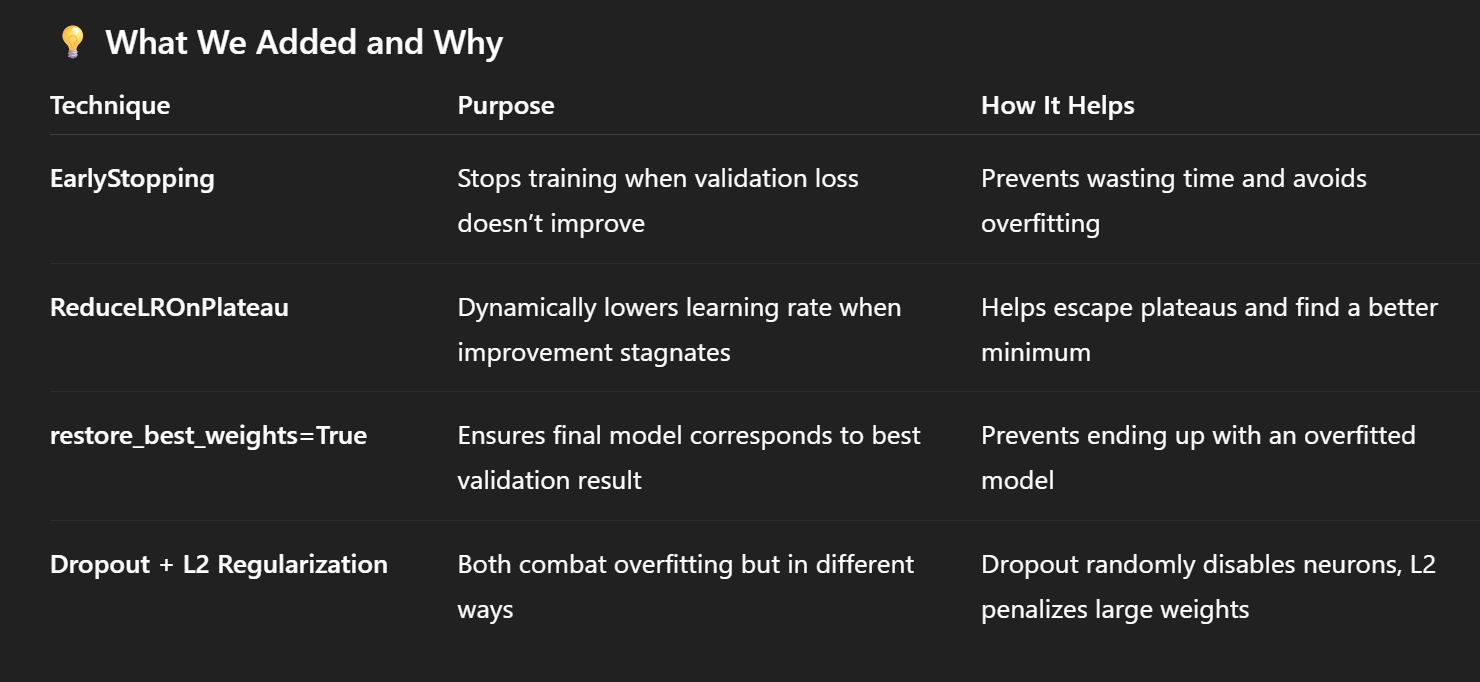

✅ Using L2 regularization with λ = 0.0015


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,804,170 (6.88 MB)

 Trainable params: 1,803,722 (6.88 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5681 - loss: 4.1037 - val_accuracy: 0.4984 - val_loss: 4.1023 - learning_rate: 1.0000e-04
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7778 - loss: 3.1730 - val_accuracy: 0.8322 - val_loss: 2.8436 - learning_rate: 1.0000e-04
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8182 - loss: 2.8220 - val_accuracy: 0.8552 - val_loss: 2.5275 - learning_rate: 1.0000e-04
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8295 - loss: 2.5350 - val_accuracy: 0.8661 - val_loss: 2.2598 - learning_rate: 1.0000e-04
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8455 - loss: 2.2577 - val_accuracy: 0.8751 - val_loss: 2.0056 - learning_rate: 1.0000e-04
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8610 - loss: 2.0019 - val_accuracy: 0.8806 - val_loss: 1.7895 - learning_rate: 1.0000e-04
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy

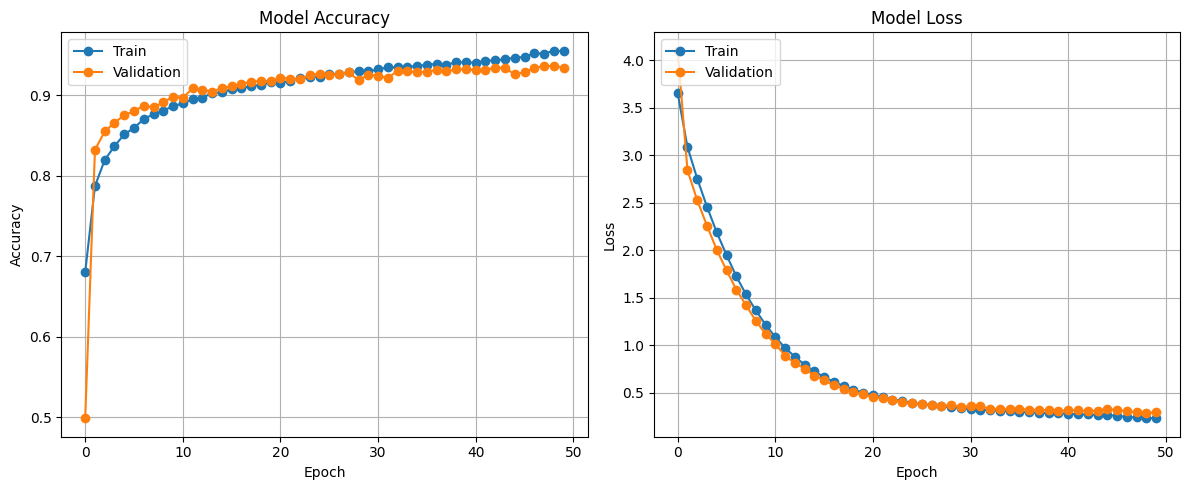

In [ ]:
# Model 4 Early stop and some other improvement see above
# -------------------------------------------------------------
# 1️⃣ Import required libraries
# -------------------------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -------------------------------------------------------------
# 2️⃣ Define regularization parameters
# -------------------------------------------------------------
use_l2_reg = True          # Set False to disable L2 regularization
l2_loss_lambda = 0.0015    # Regularization strength (λ)

# Create L2 regularizer only if enabled
l2 = regularizers.l2(l2_loss_lambda) if use_l2_reg else None

if l2 is not None:
    print(f"✅ Using L2 regularization with λ = {l2_loss_lambda}")
else:
    print("⚠️  No L2 regularization applied (kernel_regularizer=None).")

# -------------------------------------------------------------
# 3️⃣ Define the CNN architecture
# -------------------------------------------------------------
model = Sequential([
    Input(shape=INPUT_SHAPE),  # Input layer (28x28 grayscale)

    # 🔹 Convolutional Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.15),

    # 🔹 Convolutional Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # 🔹 Convolutional Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # 🧩 Flatten and Dense layers
    Flatten(),
    Dense(1024, activation='relu', kernel_regularizer=l2),
    Dropout(0.4),
    Dense(512, activation='relu', kernel_regularizer=l2),
    Dropout(0.2),

    # 🔹 Output layer
    Dense(NUM_CLASES, activation='softmax')
])

# -------------------------------------------------------------
# 4️⃣ Compile the model
# -------------------------------------------------------------
adam = Adam(learning_rate=0.0001)

model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# -------------------------------------------------------------
# 5️⃣ Define Callbacks
# -------------------------------------------------------------

# 🧠 EarlyStopping: stops training if validation loss stops improving
early_stop = EarlyStopping(
    monitor='val_loss',     # Watch the validation loss
    patience=5,             # Stop after 5 epochs with no improvement
    restore_best_weights=True,  # Roll back to the best model
    verbose=1
)

# 📉 ReduceLROnPlateau: lowers learning rate when improvement stalls
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,             # Reduce LR by half
    patience=3,             # Wait 3 epochs before reducing
    min_lr=1e-6,            # Don’t go below this LR
    verbose=1
)

# Combine callbacks into a list
callbacks_list = [early_stop, reduce_lr]

# -------------------------------------------------------------
# 6️⃣ Train the model
# -------------------------------------------------------------
history = model.fit(
    train_images, train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    callbacks=callbacks_list,   # Add callbacks here
    verbose=1
)

# -------------------------------------------------------------
# 7️⃣ Evaluate model performance
# -------------------------------------------------------------
score = model.evaluate(test_images, test_labels, verbose=0)
print(f"\n📊 Test Loss: {score[0]:.4f}")
print(f"✅ Test Accuracy: {score[1]*100:.2f}%")

# -------------------------------------------------------------
# 8️⃣ Visualize training history
# -------------------------------------------------------------
plot_training_history(history)
